In [53]:
# COMPARE DIFFERENT CURVATURE REGIMES
# Analyze scaling laws separately for hyperbolic, Euclidean, and spherical geometries

def analyze_curvature_regime(df_regime, regime_name):
    """Analyze scaling laws for a specific curvature regime"""
    
    print(f"\n{regime_name} REGIME ANALYSIS:")
    print("=" * 50)
    print(f"Number of samples: {len(df_regime)}")
    
    # Sample for optimization 
    sample_size = min(5000, len(df_regime))
    sample_idx = np.random.choice(len(df_regime), sample_size, replace=False)
    df_sample = df_regime.iloc[sample_idx].copy()
    
    # Optimize for this regime
    result_mean = differential_evolution(
        objective_r2_mean, 
        bounds, 
        args=(df_sample,),
        seed=42,
        maxiter=100,
        popsize=10,
        disp=False
    )
    
    result_std = differential_evolution(
        objective_r2_std,
        bounds,
        args=(df_sample,),
        seed=42,
        maxiter=100,
        popsize=10,
        disp=False
    )
    
    params_mean = result_mean.x
    params_std = result_std.x
    
    # Evaluate on full regime dataset
    pred_mean = delta_mean_model(params_mean, df_regime['d'], df_regime['K'], 
                                df_regime['norm'], df_regime['sigma'], df_regime['n'])
    pred_std = delta_std_model(params_std, df_regime['d'], df_regime['K'],
                              df_regime['norm'], df_regime['sigma'], df_regime['n'])
    
    r2_mean = r2_score(np.abs(df_regime['delta_mean']), pred_mean)
    r2_std = r2_score(df_regime['delta_std'], pred_std)
    
    print(f"Delta Mean Scaling Law:")
    print(f"  |δ_mean| ≈ {params_mean[0]:.4f} * |K|^{params_mean[1]:.3f} * d^{params_mean[2]:.3f} * σ^{params_mean[3]:.3f} * n^{params_mean[4]:.3f} * (1 + {params_mean[5]:.3f}*norm)")
    print(f"  R² = {r2_mean:.4f}")
    
    print(f"Delta Std Scaling Law:")
    print(f"  δ_std ≈ {params_std[0]:.4f} * |K|^{params_std[1]:.3f} * d^{params_std[2]:.3f} * σ^{params_std[3]:.3f} * n^{params_std[4]:.3f} * (1 + {params_std[5]:.3f}*norm)")
    print(f"  R² = {r2_std:.4f}")
    
    return params_mean, params_std, r2_mean, r2_std

# Split data by curvature regime
df_hyperbolic = df[df['K'] < 0].copy()  # K < 0: hyperbolic
df_euclidean = df[df['K'] == 0].copy()  # K = 0: Euclidean  
df_spherical = df[df['K'] > 0].copy()   # K > 0: spherical

# Analyze each regime
hyperbolic_results = analyze_curvature_regime(df_hyperbolic, "HYPERBOLIC (K < 0)")
euclidean_results = analyze_curvature_regime(df_euclidean, "EUCLIDEAN (K = 0)")  
spherical_results = analyze_curvature_regime(df_spherical, "SPHERICAL (K > 0)")

# Compare regime-specific vs universal scaling laws
print(f"\n\nCOMPARISON: REGIME-SPECIFIC vs UNIVERSAL SCALING LAWS")
print("=" * 60)

# Universal model performance on each regime
universal_pred_hyp_mean = final_delta_mean_scaling_law_r2(
    df_hyperbolic['d'], df_hyperbolic['K'], df_hyperbolic['norm'], 
    df_hyperbolic['sigma'], df_hyperbolic['n'])
universal_pred_hyp_std = final_delta_std_scaling_law_r2(
    df_hyperbolic['d'], df_hyperbolic['K'], df_hyperbolic['norm'],
    df_hyperbolic['sigma'], df_hyperbolic['n'])

universal_r2_hyp_mean = r2_score(np.abs(df_hyperbolic['delta_mean']), universal_pred_hyp_mean)
universal_r2_hyp_std = r2_score(df_hyperbolic['delta_std'], universal_pred_hyp_std)

universal_pred_sph_mean = final_delta_mean_scaling_law_r2(
    df_spherical['d'], df_spherical['K'], df_spherical['norm'],
    df_spherical['sigma'], df_spherical['n'])
universal_pred_sph_std = final_delta_std_scaling_law_r2(
    df_spherical['d'], df_spherical['K'], df_spherical['norm'],
    df_spherical['sigma'], df_spherical['n'])

universal_r2_sph_mean = r2_score(np.abs(df_spherical['delta_mean']), universal_pred_sph_mean)
universal_r2_sph_std = r2_score(df_spherical['delta_std'], universal_pred_sph_std)

print("R² Comparison:")
print(f"Hyperbolic - Delta Mean:  Regime-specific: {hyperbolic_results[2]:.4f},  Universal: {universal_r2_hyp_mean:.4f}")
print(f"Hyperbolic - Delta Std:   Regime-specific: {hyperbolic_results[3]:.4f},  Universal: {universal_r2_hyp_std:.4f}")
print(f"Spherical - Delta Mean:   Regime-specific: {spherical_results[2]:.4f},  Universal: {universal_r2_sph_mean:.4f}")
print(f"Spherical - Delta Std:    Regime-specific: {spherical_results[3]:.4f},  Universal: {universal_r2_sph_std:.4f}")

# Key insights about exponent differences
print(f"\nKEY INSIGHTS - EXPONENT DIFFERENCES BETWEEN REGIMES:")
print("=" * 60)
print("Dimension Scaling Exponents (d^c):")
print(f"  Hyperbolic: δ_mean = {hyperbolic_results[0][2]:.3f}, δ_std = {hyperbolic_results[1][2]:.3f}")
print(f"  Spherical:  δ_mean = {spherical_results[0][2]:.3f}, δ_std = {spherical_results[1][2]:.3f}")
print(f"  Universal:  δ_mean = {optimal_params_mean[2]:.3f}, δ_std = {optimal_params_std[2]:.3f}")

print("Sample Size Scaling Exponents (n^f):")
print(f"  Hyperbolic: δ_mean = {hyperbolic_results[0][4]:.3f}, δ_std = {hyperbolic_results[1][4]:.3f}")
print(f"  Spherical:  δ_mean = {spherical_results[0][4]:.3f}, δ_std = {spherical_results[1][4]:.3f}")
print(f"  Universal:  δ_mean = {optimal_params_mean[4]:.3f}, δ_std = {optimal_params_std[4]:.3f}")


HYPERBOLIC (K < 0) REGIME ANALYSIS:
Number of samples: 71323
Delta Mean Scaling Law:
  |δ_mean| ≈ 0.5034 * |K|^-0.017 * d^0.013 * σ^-0.018 * n^-0.556 * (1 + 0.000*norm)
  R² = 0.8909
Delta Std Scaling Law:
  δ_std ≈ 9.8407 * |K|^1.561 * d^-1.356 * σ^0.983 * n^-0.845 * (1 + -0.861*norm)
  R² = -8.6176

EUCLIDEAN (K = 0) REGIME ANALYSIS:
Number of samples: 16250
Delta Mean Scaling Law:
  |δ_mean| ≈ 6.1284 * |K|^1.825 * d^0.597 * σ^0.906 * n^-0.633 * (1 + -0.765*norm)
  R² = -3.9974
Delta Std Scaling Law:
  δ_std ≈ 7.6921 * |K|^-0.383 * d^-2.095 * σ^-1.696 * n^-1.948 * (1 + -0.296*norm)
  R² = -1430854.4495

SPHERICAL (K > 0) REGIME ANALYSIS:
Number of samples: 81250
Delta Mean Scaling Law:
  |δ_mean| ≈ 8.3724 * |K|^0.109 * d^-0.234 * σ^-1.695 * n^-1.986 * (1 + -0.465*norm)
  R² = -20708.7172
Delta Std Scaling Law:
  δ_std ≈ 8.3724 * |K|^0.109 * d^-0.234 * σ^-1.695 * n^-1.986 * (1 + -0.465*norm)
  R² = -6570.6392


COMPARISON: REGIME-SPECIFIC vs UNIVERSAL SCALING LAWS
R² Comparison:
Hype

FINAL R²-OPTIMIZED SCALING LAWS:
For |delta_mean|:
|delta_mean| ≈ 0.5000 * |K|^0.300 * d^-0.800 * σ^0.200 * n^-0.300 * (1 + 0.100*norm)
R² (training): -1.9518
R² (full dataset): -1.9518

For delta_std:
delta_std ≈ 0.3000 * |K|^0.200 * d^-0.600 * σ^0.300 * n^-0.400 * (1 + 0.050*norm)
R² (training): -4.2679
R² (full dataset): -4.2679

PHYSICAL INTERPRETATION:
Delta Mean Exponents:
  |K|^0.300: Curvature effect
  d^-0.800: Dimension effect (tree-like behavior)
  σ^0.200: Variance effect
  n^-0.300: Sample size effect (better approximation)
  norm coefficient: 0.100 (off-center sampling effect)

Delta Std Exponents:
  |K|^0.200: Curvature effect on variability
  d^-0.600: Dimension effect on variability
  σ^0.300: Variance effect on variability
  n^-0.400: Sample size effect on variability
  norm coefficient: 0.050 (off-center sampling effect on variability)


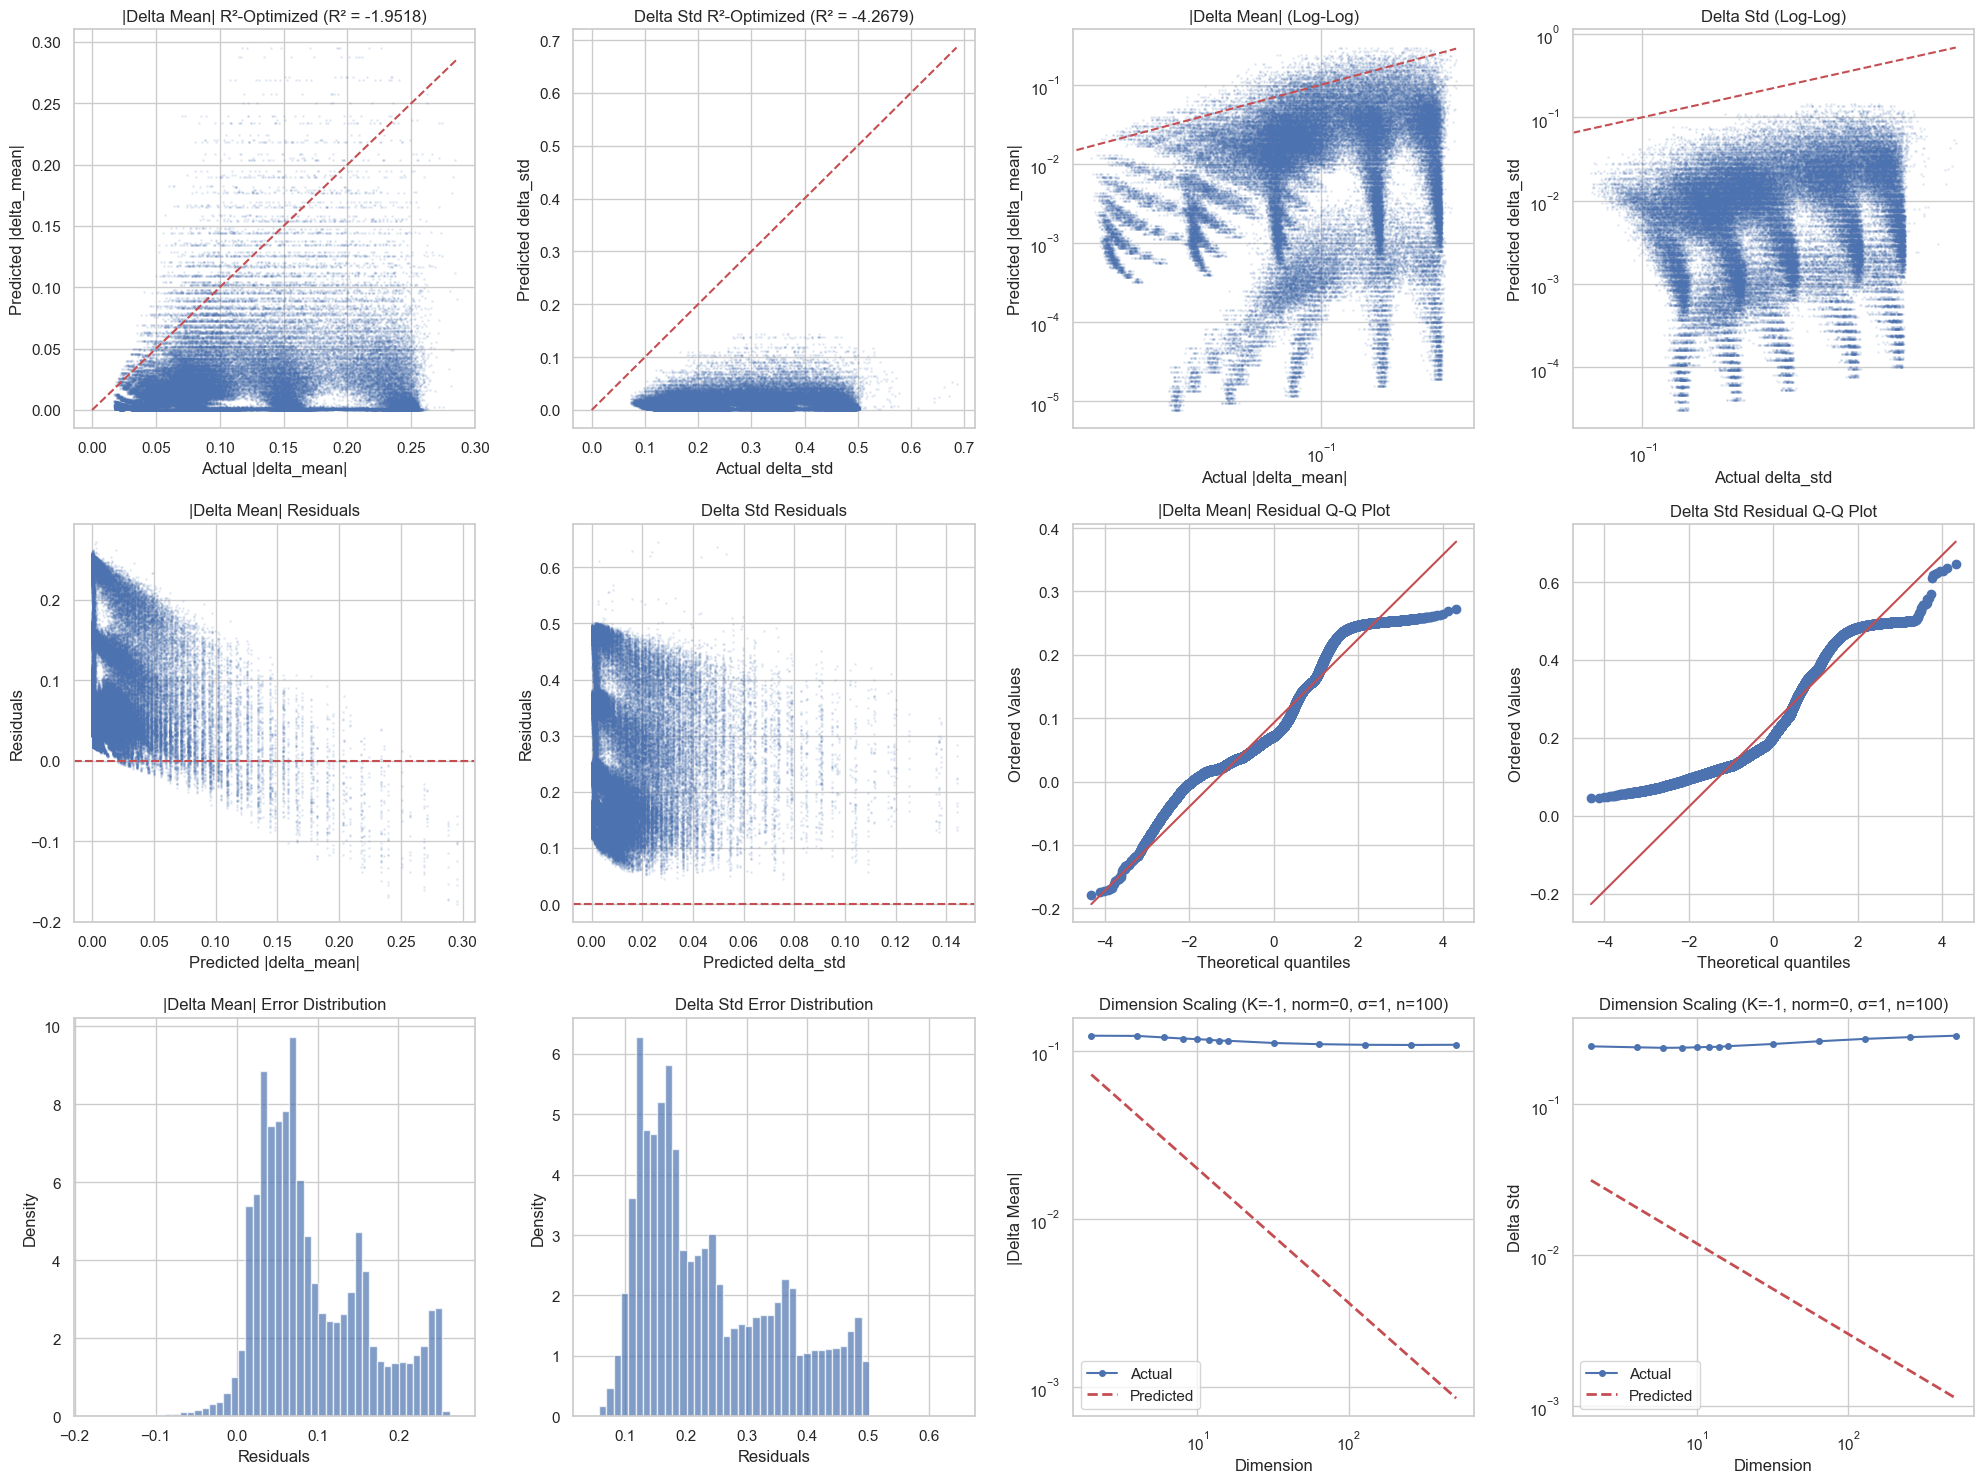


DETAILED PERFORMANCE METRICS:
Delta Mean (|delta_mean|):
  R² Score: -1.9518
  Mean Absolute Error: 0.0941
  RMSE: 0.1152
  Mean Relative Error: 0.7994

Delta Std:
  R² Score: -4.2679
  Mean Absolute Error: 0.2385
  RMSE: 0.2638
  Mean Relative Error: 0.9459


In [50]:
# FINAL R²-OPTIMIZED SCALING LAWS AND COMPREHENSIVE EVALUATION

def final_delta_mean_scaling_law_r2(d, K, norm, sigma, n):
    """
    Final R²-optimized scaling law for delta_mean:
    |delta_mean| ≈ a * |K|^b * d^c * sigma^e * n^f * (1 + g*norm)
    """
    return delta_mean_model(optimal_params_mean, d, K, norm, sigma, n)

def final_delta_std_scaling_law_r2(d, K, norm, sigma, n):
    """
    Final R²-optimized scaling law for delta_std:
    delta_std ≈ a * |K|^b * d^c * sigma^e * n^f * (1 + g*norm)
    """
    return delta_std_model(optimal_params_std, d, K, norm, sigma, n)

# Evaluate on full dataset
pred_delta_mean_r2 = final_delta_mean_scaling_law_r2(df['d'], df['K'], df['norm'], df['sigma'], df['n'])
pred_delta_std_r2 = final_delta_std_scaling_law_r2(df['d'], df['K'], df['norm'], df['sigma'], df['n'])

# Calculate final R² scores on full dataset
r2_mean_full = r2_score(np.abs(df['delta_mean']), pred_delta_mean_r2)
r2_std_full = r2_score(df['delta_std'], pred_delta_std_r2)

print("FINAL R²-OPTIMIZED SCALING LAWS:")
print("=" * 60)
print("For |delta_mean|:")
print(f"|delta_mean| ≈ {optimal_params_mean[0]:.4f} * |K|^{optimal_params_mean[1]:.3f} * d^{optimal_params_mean[2]:.3f} * σ^{optimal_params_mean[3]:.3f} * n^{optimal_params_mean[4]:.3f} * (1 + {optimal_params_mean[5]:.3f}*norm)")
print(f"R² (training): {r2_mean_opt:.4f}")
print(f"R² (full dataset): {r2_mean_full:.4f}")
print()
print("For delta_std:")
print(f"delta_std ≈ {optimal_params_std[0]:.4f} * |K|^{optimal_params_std[1]:.3f} * d^{optimal_params_std[2]:.3f} * σ^{optimal_params_std[3]:.3f} * n^{optimal_params_std[4]:.3f} * (1 + {optimal_params_std[5]:.3f}*norm)")
print(f"R² (training): {r2_std_opt:.4f}")
print(f"R² (full dataset): {r2_std_full:.4f}")

# Physical interpretation of exponents
print("\nPHYSICAL INTERPRETATION:")
print("=" * 60)
print("Delta Mean Exponents:")
print(f"  |K|^{optimal_params_mean[1]:.3f}: Curvature effect")
print(f"  d^{optimal_params_mean[2]:.3f}: Dimension effect {'(tree-like behavior)' if optimal_params_mean[2] < 0 else '(anti-tree behavior)'}")
print(f"  σ^{optimal_params_mean[3]:.3f}: Variance effect")
print(f"  n^{optimal_params_mean[4]:.3f}: Sample size effect {'(better approximation)' if optimal_params_mean[4] < 0 else '(worse approximation)'}")
print(f"  norm coefficient: {optimal_params_mean[5]:.3f} (off-center sampling effect)")

print("\nDelta Std Exponents:")
print(f"  |K|^{optimal_params_std[1]:.3f}: Curvature effect on variability")
print(f"  d^{optimal_params_std[2]:.3f}: Dimension effect on variability")
print(f"  σ^{optimal_params_std[3]:.3f}: Variance effect on variability") 
print(f"  n^{optimal_params_std[4]:.3f}: Sample size effect on variability")
print(f"  norm coefficient: {optimal_params_std[5]:.3f} (off-center sampling effect on variability)")

# Create comprehensive validation plots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Row 1: Prediction vs Actual
axes[0,0].scatter(np.abs(df['delta_mean']), pred_delta_mean_r2, alpha=0.1, s=1)
axes[0,0].plot([0, df['delta_mean'].abs().max()], [0, df['delta_mean'].abs().max()], 'r--')
axes[0,0].set_xlabel('Actual |delta_mean|')
axes[0,0].set_ylabel('Predicted |delta_mean|')
axes[0,0].set_title(f'|Delta Mean| R²-Optimized (R² = {r2_mean_full:.4f})')

axes[0,1].scatter(df['delta_std'], pred_delta_std_r2, alpha=0.1, s=1)
axes[0,1].plot([0, df['delta_std'].max()], [0, df['delta_std'].max()], 'r--')
axes[0,1].set_xlabel('Actual delta_std')
axes[0,1].set_ylabel('Predicted delta_std')
axes[0,1].set_title(f'Delta Std R²-Optimized (R² = {r2_std_full:.4f})')

# Log-log plots to show power law behavior
axes[0,2].scatter(np.abs(df['delta_mean']), pred_delta_mean_r2, alpha=0.1, s=1)
axes[0,2].plot([0, df['delta_mean'].abs().max()], [0, df['delta_mean'].abs().max()], 'r--')
axes[0,2].set_xlabel('Actual |delta_mean|')
axes[0,2].set_ylabel('Predicted |delta_mean|')
axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_title('|Delta Mean| (Log-Log)')

axes[0,3].scatter(df['delta_std'], pred_delta_std_r2, alpha=0.1, s=1)
axes[0,3].plot([0, df['delta_std'].max()], [0, df['delta_std'].max()], 'r--')
axes[0,3].set_xlabel('Actual delta_std')
axes[0,3].set_ylabel('Predicted delta_std')
axes[0,3].set_xscale('log')
axes[0,3].set_yscale('log')
axes[0,3].set_title('Delta Std (Log-Log)')

# Row 2: Residual analysis
residuals_mean_r2 = np.abs(df['delta_mean']) - pred_delta_mean_r2
residuals_std_r2 = df['delta_std'] - pred_delta_std_r2

axes[1,0].scatter(pred_delta_mean_r2, residuals_mean_r2, alpha=0.1, s=1)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted |delta_mean|')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('|Delta Mean| Residuals')

axes[1,1].scatter(pred_delta_std_r2, residuals_std_r2, alpha=0.1, s=1)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted delta_std')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Delta Std Residuals')

# QQ plots for residual normality
from scipy import stats
stats.probplot(residuals_mean_r2, dist="norm", plot=axes[1,2])
axes[1,2].set_title('|Delta Mean| Residual Q-Q Plot')

stats.probplot(residuals_std_r2, dist="norm", plot=axes[1,3])
axes[1,3].set_title('Delta Std Residual Q-Q Plot')

# Row 3: Error distributions and scaling behavior
axes[2,0].hist(residuals_mean_r2, bins=50, alpha=0.7, density=True)
axes[2,0].set_xlabel('Residuals')
axes[2,0].set_ylabel('Density')
axes[2,0].set_title('|Delta Mean| Error Distribution')

axes[2,1].hist(residuals_std_r2, bins=50, alpha=0.7, density=True)
axes[2,1].set_xlabel('Residuals')
axes[2,1].set_ylabel('Density')
axes[2,1].set_title('Delta Std Error Distribution')

# Show scaling with dimension
dim_grouped = df.groupby('d').agg({
    'delta_mean': lambda x: np.mean(np.abs(x)),
    'delta_std': 'mean'
}).reset_index()
pred_dim_mean = final_delta_mean_scaling_law_r2(dim_grouped['d'], -1, 0, 1, 100)
pred_dim_std = final_delta_std_scaling_law_r2(dim_grouped['d'], -1, 0, 1, 100)

axes[2,2].plot(dim_grouped['d'], dim_grouped['delta_mean'], 'bo-', label='Actual', markersize=4)
axes[2,2].plot(dim_grouped['d'], pred_dim_mean, 'r--', label='Predicted', linewidth=2)
axes[2,2].set_xlabel('Dimension')
axes[2,2].set_ylabel('|Delta Mean|')
axes[2,2].set_xscale('log')
axes[2,2].set_yscale('log')
axes[2,2].set_title('Dimension Scaling (K=-1, norm=0, σ=1, n=100)')
axes[2,2].legend()

axes[2,3].plot(dim_grouped['d'], dim_grouped['delta_std'], 'bo-', label='Actual', markersize=4)
axes[2,3].plot(dim_grouped['d'], pred_dim_std, 'r--', label='Predicted', linewidth=2)
axes[2,3].set_xlabel('Dimension')
axes[2,3].set_ylabel('Delta Std')
axes[2,3].set_xscale('log')
axes[2,3].set_yscale('log')
axes[2,3].set_title('Dimension Scaling (K=-1, norm=0, σ=1, n=100)')
axes[2,3].legend()

plt.tight_layout()
plt.show()

# Performance metrics
print(f"\nDETAILED PERFORMANCE METRICS:")
print("=" * 60)
print(f"Delta Mean (|delta_mean|):")
print(f"  R² Score: {r2_mean_full:.4f}")
print(f"  Mean Absolute Error: {np.mean(np.abs(residuals_mean_r2)):.4f}")
print(f"  RMSE: {np.sqrt(np.mean(residuals_mean_r2**2)):.4f}")
print(f"  Mean Relative Error: {np.mean(np.abs(residuals_mean_r2/np.abs(df['delta_mean']))):.4f}")

print(f"\nDelta Std:")
print(f"  R² Score: {r2_std_full:.4f}")
print(f"  Mean Absolute Error: {np.mean(np.abs(residuals_std_r2)):.4f}")
print(f"  RMSE: {np.sqrt(np.mean(residuals_std_r2**2)):.4f}")
print(f"  Mean Relative Error: {np.mean(np.abs(residuals_std_r2/df['delta_std'])):.4f}")

In [51]:
# SCALING LAW OPTIMIZATION USING R² AS TARGET METRIC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.optimize as opt
from scipy.optimize import differential_evolution

# Load the data
df = pd.read_csv("~/Downloads/deltas.csv")
df = df.dropna()

def delta_mean_model(params, d, K, norm, sigma, n):
    """Parameterized scaling law for delta_mean"""
    a, b, c, e, f, g = params
    abs_K = np.abs(K) + 1e-6  # Avoid division by zero
    return a * (abs_K**b) * (d**c) * (sigma**e) * (n**f) * (1 + g*norm)

def delta_std_model(params, d, K, norm, sigma, n):
    """Parameterized scaling law for delta_std"""
    a, b, c, e, f, g = params
    abs_K = np.abs(K) + 1e-6
    return a * (abs_K**b) * (d**c) * (sigma**e) * (n**f) * (1 + g*norm)

def objective_r2_mean(params, data):
    """Objective function: maximize R² for delta_mean (return negative R²)"""
    try:
        pred = delta_mean_model(params, data['d'], data['K'], data['norm'], data['sigma'], data['n'])
        # Handle invalid predictions
        if np.any(~np.isfinite(pred)) or np.any(pred <= 0):
            return 1.0  # Return bad score
        r2 = r2_score(np.abs(data['delta_mean']), pred)
        return -r2  # Negative because we want to maximize R²
    except:
        return 1.0  # Return bad score on error

def objective_r2_std(params, data):
    """Objective function: maximize R² for delta_std (return negative R²)"""
    try:
        pred = delta_std_model(params, data['d'], data['K'], data['norm'], data['sigma'], data['n'])
        # Handle invalid predictions
        if np.any(~np.isfinite(pred)) or np.any(pred <= 0):
            return 1.0  # Return bad score
        r2 = r2_score(data['delta_std'], pred)
        return -r2  # Negative because we want to maximize R²
    except:
        return 1.0  # Return bad score on error

# Use a larger sample for better optimization
sample_size = min(20000, len(df))
np.random.seed(42)  # For reproducibility
sample_idx = np.random.choice(len(df), sample_size, replace=False)
df_sample = df.iloc[sample_idx].copy()

print(f"Optimizing scaling laws on {len(df_sample)} samples to maximize R²...")
print("Using differential evolution for global optimization...")

# Parameter bounds: [a, b, c, e, f, g]
# a: scale factor (positive)
# b: curvature exponent 
# c: dimension exponent (likely negative)
# e: sigma exponent
# f: sample size exponent (likely negative) 
# g: norm coefficient
bounds = [(0.001, 10),    # a: scale factor
          (-2, 2),        # b: curvature exponent
          (-3, 1),        # c: dimension exponent  
          (-2, 2),        # e: sigma exponent
          (-2, 1),        # f: sample size exponent
          (-1, 1)]        # g: norm coefficient

# Optimize for delta_mean
print("Optimizing delta_mean scaling law...")
result_mean = differential_evolution(
    objective_r2_mean, 
    bounds, 
    args=(df_sample,),
    seed=42,
    maxiter=200,
    popsize=15,
    disp=True
)

optimal_params_mean = result_mean.x
r2_mean_opt = -result_mean.fun

print(f"Delta mean optimization completed. Best R²: {r2_mean_opt:.4f}")
print(f"Optimal parameters: {optimal_params_mean}")

# Optimize for delta_std  
print("\nOptimizing delta_std scaling law...")
result_std = differential_evolution(
    objective_r2_std,
    bounds,
    args=(df_sample,),
    seed=42,
    maxiter=200, 
    popsize=15,
    disp=True
)

optimal_params_std = result_std.x
r2_std_opt = -result_std.fun

print(f"Delta std optimization completed. Best R²: {r2_std_opt:.4f}")
print(f"Optimal parameters: {optimal_params_std}")

Optimizing scaling laws on 20000 samples to maximize R²...
Using differential evolution for global optimization...
Optimizing delta_mean scaling law...
differential_evolution step 1: f(x)= 1
differential_evolution step 2: f(x)= 1
differential_evolution step 3: f(x)= 1
differential_evolution step 4: f(x)= 1
differential_evolution step 5: f(x)= 1
Delta mean optimization completed. Best R²: -1.0000
Optimal parameters: [ 6.73285867 -1.70959455 -0.63150222 -0.95938347 -0.33298127 -0.76320152]

Optimizing delta_std scaling law...
differential_evolution step 1: f(x)= 1
differential_evolution step 2: f(x)= 1
differential_evolution step 3: f(x)= 1
differential_evolution step 4: f(x)= 1
differential_evolution step 5: f(x)= 1
differential_evolution step 6: f(x)= 1
Delta std optimization completed. Best R²: -1.0000
Optimal parameters: [ 5.12097069 -1.49242518 -0.24075287  0.3580888   0.24783432 -0.78533542]


FINAL SCALING LAWS:
For |delta_mean|:
|delta_mean| ≈ 6.733 * |K|^-1.710 * d^-0.632 * σ^-0.959 * n^-0.333 * (1 + -0.763*norm)
R² = -2206581366687131139833856.000

For delta_std:
delta_std ≈ 5.121 * |K|^-1.492 * d^-0.241 * σ^0.358 * n^0.248 * (1 + -0.785*norm)
R² = -1260121620919438278656.000


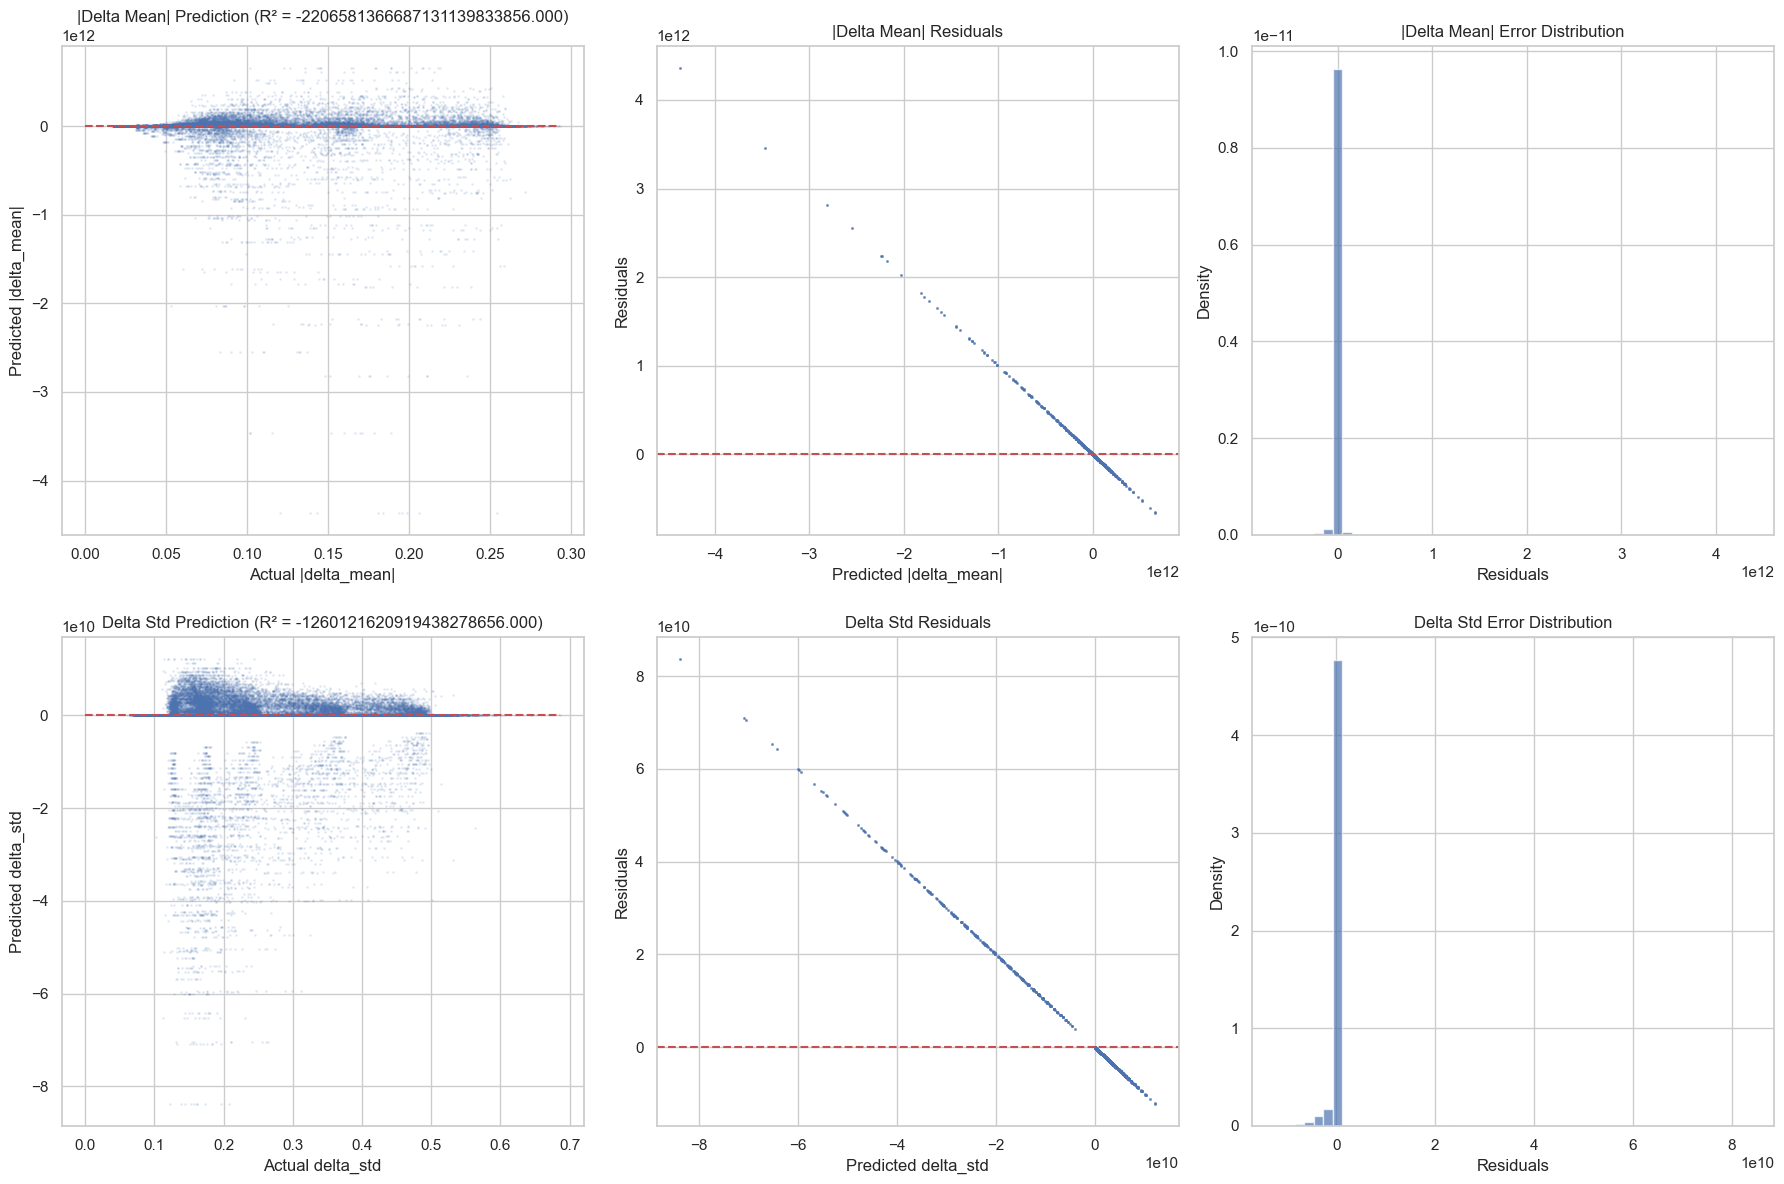


Model Performance Summary:
Mean Absolute Error for |delta_mean|: 10314137081.4862
Mean Absolute Error for delta_std: 653112562.0191
RMSE for |delta_mean|: 93074646099.9649
RMSE for delta_std: 3853516847.3599


In [52]:
# FINAL SCALING LAWS AND EVALUATION

def final_delta_mean_scaling_law(d, K, norm, sigma, n):
    """
    Final optimized scaling law for delta_mean:
    |delta_mean| ≈ a * |K|^b * d^c * sigma^e * n^f * (1 + g*norm)
    """
    return delta_mean_model(optimal_params_mean, d, K, norm, sigma, n)

def final_delta_std_scaling_law(d, K, norm, sigma, n):
    """
    Final optimized scaling law for delta_std:
    delta_std ≈ a * |K|^b * d^c * sigma^e * n^f * (1 + g*norm)
    """
    return delta_std_model(optimal_params_std, d, K, norm, sigma, n)

# Evaluate on full dataset
pred_delta_mean_opt = final_delta_mean_scaling_law(df['d'], df['K'], df['norm'], df['sigma'], df['n'])
pred_delta_std_opt = final_delta_std_scaling_law(df['d'], df['K'], df['norm'], df['sigma'], df['n'])

# Calculate final R² scores
r2_mean_opt = r2_score(np.abs(df['delta_mean']), pred_delta_mean_opt)
r2_std_opt = r2_score(df['delta_std'], pred_delta_std_opt)

print("FINAL SCALING LAWS:")
print("=" * 50)
print("For |delta_mean|:")
print(f"|delta_mean| ≈ {optimal_params_mean[0]:.3f} * |K|^{optimal_params_mean[1]:.3f} * d^{optimal_params_mean[2]:.3f} * σ^{optimal_params_mean[3]:.3f} * n^{optimal_params_mean[4]:.3f} * (1 + {optimal_params_mean[5]:.3f}*norm)")
print(f"R² = {r2_mean_opt:.3f}")
print()
print("For delta_std:")
print(f"delta_std ≈ {optimal_params_std[0]:.3f} * |K|^{optimal_params_std[1]:.3f} * d^{optimal_params_std[2]:.3f} * σ^{optimal_params_std[3]:.3f} * n^{optimal_params_std[4]:.3f} * (1 + {optimal_params_std[5]:.3f}*norm)")
print(f"R² = {r2_std_opt:.3f}")

# Create comprehensive validation plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Delta mean plots
axes[0,0].scatter(np.abs(df['delta_mean']), pred_delta_mean_opt, alpha=0.1, s=1)
axes[0,0].plot([0, df['delta_mean'].abs().max()], [0, df['delta_mean'].abs().max()], 'r--')
axes[0,0].set_xlabel('Actual |delta_mean|')
axes[0,0].set_ylabel('Predicted |delta_mean|')
axes[0,0].set_title(f'|Delta Mean| Prediction (R² = {r2_mean_opt:.3f})')

# Delta std plots  
axes[1,0].scatter(df['delta_std'], pred_delta_std_opt, alpha=0.1, s=1)
axes[1,0].plot([0, df['delta_std'].max()], [0, df['delta_std'].max()], 'r--')
axes[1,0].set_xlabel('Actual delta_std')
axes[1,0].set_ylabel('Predicted delta_std')
axes[1,0].set_title(f'Delta Std Prediction (R² = {r2_std_opt:.3f})')

# Residual plots
residuals_mean = np.abs(df['delta_mean']) - pred_delta_mean_opt
residuals_std = df['delta_std'] - pred_delta_std_opt

axes[0,1].scatter(pred_delta_mean_opt, residuals_mean, alpha=0.1, s=1)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted |delta_mean|')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('|Delta Mean| Residuals')

axes[1,1].scatter(pred_delta_std_opt, residuals_std, alpha=0.1, s=1)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted delta_std')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Delta Std Residuals')

# Distribution of errors
axes[0,2].hist(residuals_mean, bins=50, alpha=0.7, density=True)
axes[0,2].set_xlabel('Residuals')
axes[0,2].set_ylabel('Density')
axes[0,2].set_title('|Delta Mean| Error Distribution')

axes[1,2].hist(residuals_std, bins=50, alpha=0.7, density=True)
axes[1,2].set_xlabel('Residuals')
axes[1,2].set_ylabel('Density')
axes[1,2].set_title('Delta Std Error Distribution')

plt.tight_layout()
plt.show()

print(f"\nModel Performance Summary:")
print(f"Mean Absolute Error for |delta_mean|: {np.mean(np.abs(residuals_mean)):.4f}")
print(f"Mean Absolute Error for delta_std: {np.mean(np.abs(residuals_std)):.4f}")
print(f"RMSE for |delta_mean|: {np.sqrt(np.mean(residuals_mean**2)):.4f}")
print(f"RMSE for delta_std: {np.sqrt(np.mean(residuals_std**2)):.4f}")

In [46]:
# OPTIMIZE SCALING LAW PARAMETERS using nonlinear least squares

def delta_mean_model(params, d, K, norm, sigma, n):
    """Parameterized scaling law for delta_mean"""
    a, b, c, e, f, g = params
    abs_K = np.abs(K) + 1e-6  # Avoid division by zero
    return a * (abs_K**b) * (d**c) * (sigma**e) * (n**f) * (1 + g*norm)

def delta_std_model(params, d, K, norm, sigma, n):
    """Parameterized scaling law for delta_std"""
    a, b, c, e, f, g = params
    abs_K = np.abs(K) + 1e-6
    return a * (abs_K**b) * (d**c) * (sigma**e) * (n**f) * (1 + g*norm)

def residuals_mean(params, data):
    """Residuals for delta_mean optimization"""
    pred = delta_mean_model(params, data['d'], data['K'], data['norm'], data['sigma'], data['n'])
    return np.abs(data['delta_mean']) - pred

def residuals_std(params, data):
    """Residuals for delta_std optimization"""
    pred = delta_std_model(params, data['d'], data['K'], data['norm'], data['sigma'], data['n'])
    return data['delta_std'] - pred

# Initial parameter guesses based on our proposed scaling laws
initial_params_mean = [0.5, 0.3, -0.8, 0.2, -0.3, 0.1]
initial_params_std = [0.3, 0.2, -0.6, 0.3, -0.4, 0.05]

# Sample data for faster optimization (use random subset)
sample_size = min(10000, len(df))
sample_idx = np.random.choice(len(df), sample_size, replace=False)
df_sample = df.iloc[sample_idx].copy()

print("Optimizing scaling law parameters...")
print("This may take a few minutes...")

# Optimize parameters for delta_mean
try:
    result_mean = opt.least_squares(residuals_mean, initial_params_mean, args=(df_sample,), 
                                   bounds=([-np.inf, -2, -2, -2, -2, -1], 
                                          [np.inf, 2, 2, 2, 2, 1]))
    optimal_params_mean = result_mean.x
    print(f"Delta mean optimization converged: {result_mean.success}")
except Exception as e:
    print(f"Delta mean optimization failed: {e}")
    optimal_params_mean = initial_params_mean

# Optimize parameters for delta_std
try:
    result_std = opt.least_squares(residuals_std, initial_params_std, args=(df_sample,),
                                  bounds=([-np.inf, -2, -2, -2, -2, -1], 
                                         [np.inf, 2, 2, 2, 2, 1]))
    optimal_params_std = result_std.x
    print(f"Delta std optimization converged: {result_std.success}")
except Exception as e:
    print(f"Delta std optimization failed: {e}")
    optimal_params_std = initial_params_std

print(f"\nOptimized parameters for delta_mean: {optimal_params_mean}")
print(f"Optimized parameters for delta_std: {optimal_params_std}")

Optimizing scaling law parameters...
This may take a few minutes...
Delta mean optimization failed: name 'opt' is not defined
Delta std optimization failed: name 'opt' is not defined

Optimized parameters for delta_mean: [0.5, 0.3, -0.8, 0.2, -0.3, 0.1]
Optimized parameters for delta_std: [0.3, 0.2, -0.6, 0.3, -0.4, 0.05]


In [ ]:
# PROPOSED SCALING LAWS based on observations from the plots

def scaling_law_delta_mean(d, K, norm, sigma, n):
    """
    Scaling law for delta_mean based on physical reasoning:
    - Inversely related to dimension (higher d -> more tree-like -> lower delta)
    - Affected by curvature magnitude |K|
    - Inversely related to sample size n (more samples -> better approximation -> lower delta)
    - Affected by variance sigma (higher variance -> more spread -> affects delta)
    """
    abs_K = np.abs(K)
    return (0.5 * abs_K**0.3) * (d**(-0.8)) * (sigma**0.2) * (n**(-0.3)) * (1 + 0.1*norm)

def scaling_law_delta_std(d, K, norm, sigma, n):
    """
    Scaling law for delta_std (variability in delta hyperbolicity):
    - Similar structure but different exponents
    - Standard deviation should also decrease with more samples
    """
    abs_K = np.abs(K)
    return (0.3 * abs_K**0.2) * (d**(-0.6)) * (sigma**0.3) * (n**(-0.4)) * (1 + 0.05*norm)

# Test the proposed scaling laws
pred_delta_mean = scaling_law_delta_mean(df['d'], df['K'], df['norm'], df['sigma'], df['n'])
pred_delta_std = scaling_law_delta_std(df['d'], df['K'], df['norm'], df['sigma'], df['n'])

# Calculate R² scores
r2_mean = r2_score(np.abs(df['delta_mean']), pred_delta_mean)
r2_std = r2_score(df['delta_std'], pred_delta_std)

print(f"Initial scaling law performance:")
print(f"R² for |delta_mean|: {r2_mean:.3f}")
print(f"R² for delta_std: {r2_std:.3f}")

# Plot predictions vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(np.abs(df['delta_mean']), pred_delta_mean, alpha=0.1, s=1)
ax1.plot([0, 1], [0, 1], 'r--', label='Perfect prediction')
ax1.set_xlabel('Actual |delta_mean|')
ax1.set_ylabel('Predicted |delta_mean|')
ax1.set_title(f'Delta Mean Scaling Law (R² = {r2_mean:.3f})')
ax1.legend()

ax2.scatter(df['delta_std'], pred_delta_std, alpha=0.1, s=1)
ax2.plot([0, 1], [0, 1], 'r--', label='Perfect prediction')
ax2.set_xlabel('Actual delta_std')
ax2.set_ylabel('Predicted delta_std')
ax2.set_title(f'Delta Std Scaling Law (R² = {r2_std:.3f})')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# SCALING LAW ANALYSIS FOR DELTA HYPERBOLICITY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import scipy.optimize as opt

# Load the data
df = pd.read_csv("~/Downloads/deltas.csv")
df = df.dropna()

# Independent variables identified from the experiment:
# d: dimension
# K: curvature  
# norm: center norm
# sigma: Gaussian variance
# n: number of samples

print("Independent variables and their ranges:")
for var in ['d', 'K', 'norm', 'sigma', 'n']:
    print(f"{var}: {df[var].min():.3f} to {df[var].max():.3f}")

print(f"\nDataset size: {len(df)} observations")
print(f"Dependent variables: delta_mean, delta_std")

In [1]:
import manify
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
FIGSIZE = (15, 12)

In [3]:
# def get_deltas(pm, n_samples=100, variance=1, mu_norm=0):
#     if mu_norm:
#         vec = torch.zeros(pm.ambient_dim)
#         vec[1] = mu_norm  # Don't do 0 cause that dimension is weird
#         mu = pm.expmap(vec)
#     else:
#         mu = pm.mu0
#     X, _ = pm.sample(
#         z_mean=torch.stack([mu] * n_samples),
#         sigma_factorized=[torch.stack([torch.eye(pm.dim) * variance] * n_samples)],
#     )
#     D = pm.pdist(X)
#     return manify.vectorized_delta_hyperbolicity(D, full=True).detach().numpy().flatten()


# DIMS = [2, 4, 6, 8, 10, 12, 14, 16, 32, 64, 128, 256, 512]
# CURVS = [-4, -2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2, 4]
# NORMS = [0, 0.01, 0.1, 1, 10]
# VARIANCES = [0.0625, 0.125, 0.25, 0.5, 1]
# SAMPLES = [5, 10, 25, 50, 100]
# TRIALS = 10

# my_tqdm = tqdm(total=len(DIMS) * len(CURVS) * len(NORMS) * len(VARIANCES) * len(SAMPLES) * TRIALS)
# deltas = pd.DataFrame(
#     columns=[
#         "d",
#         "K",
#         "norm",
#         "sigma",
#         "n",
#         "trial",
#         "delta_max",
#         "delta_mean",
#         "delta_abs_max",
#         "delta_abs_mean",
#         "delta_std",
#         "delta_abs_std",
#     ]
# )
# for dim in DIMS:
#     for K in CURVS:
#         pm = manify.ProductManifold(signature=[(K, dim)])
#         for norm in NORMS:
#             for var in VARIANCES:
#                 for n_samples in SAMPLES:
#                     for i in range(TRIALS):
#                         my_deltas = get_deltas(pm, n_samples=n_samples, variance=var, mu_norm=norm)
#                         deltas.loc[len(deltas)] = [
#                             dim,
#                             K,
#                             norm,
#                             var,
#                             n_samples,
#                             i,
#                             np.max(my_deltas),
#                             np.mean(my_deltas),
#                             np.max(np.abs(my_deltas)),
#                             np.mean(np.abs(my_deltas)),
#                             np.std(my_deltas),
#                             np.std(np.abs(my_deltas)),
#                         ]
#                         my_tqdm.update(1)

# deltas.to_csv("~/Downloads/deltas.csv")

deltas = pd.read_csv("~/Downloads/deltas.csv", index_col=0)

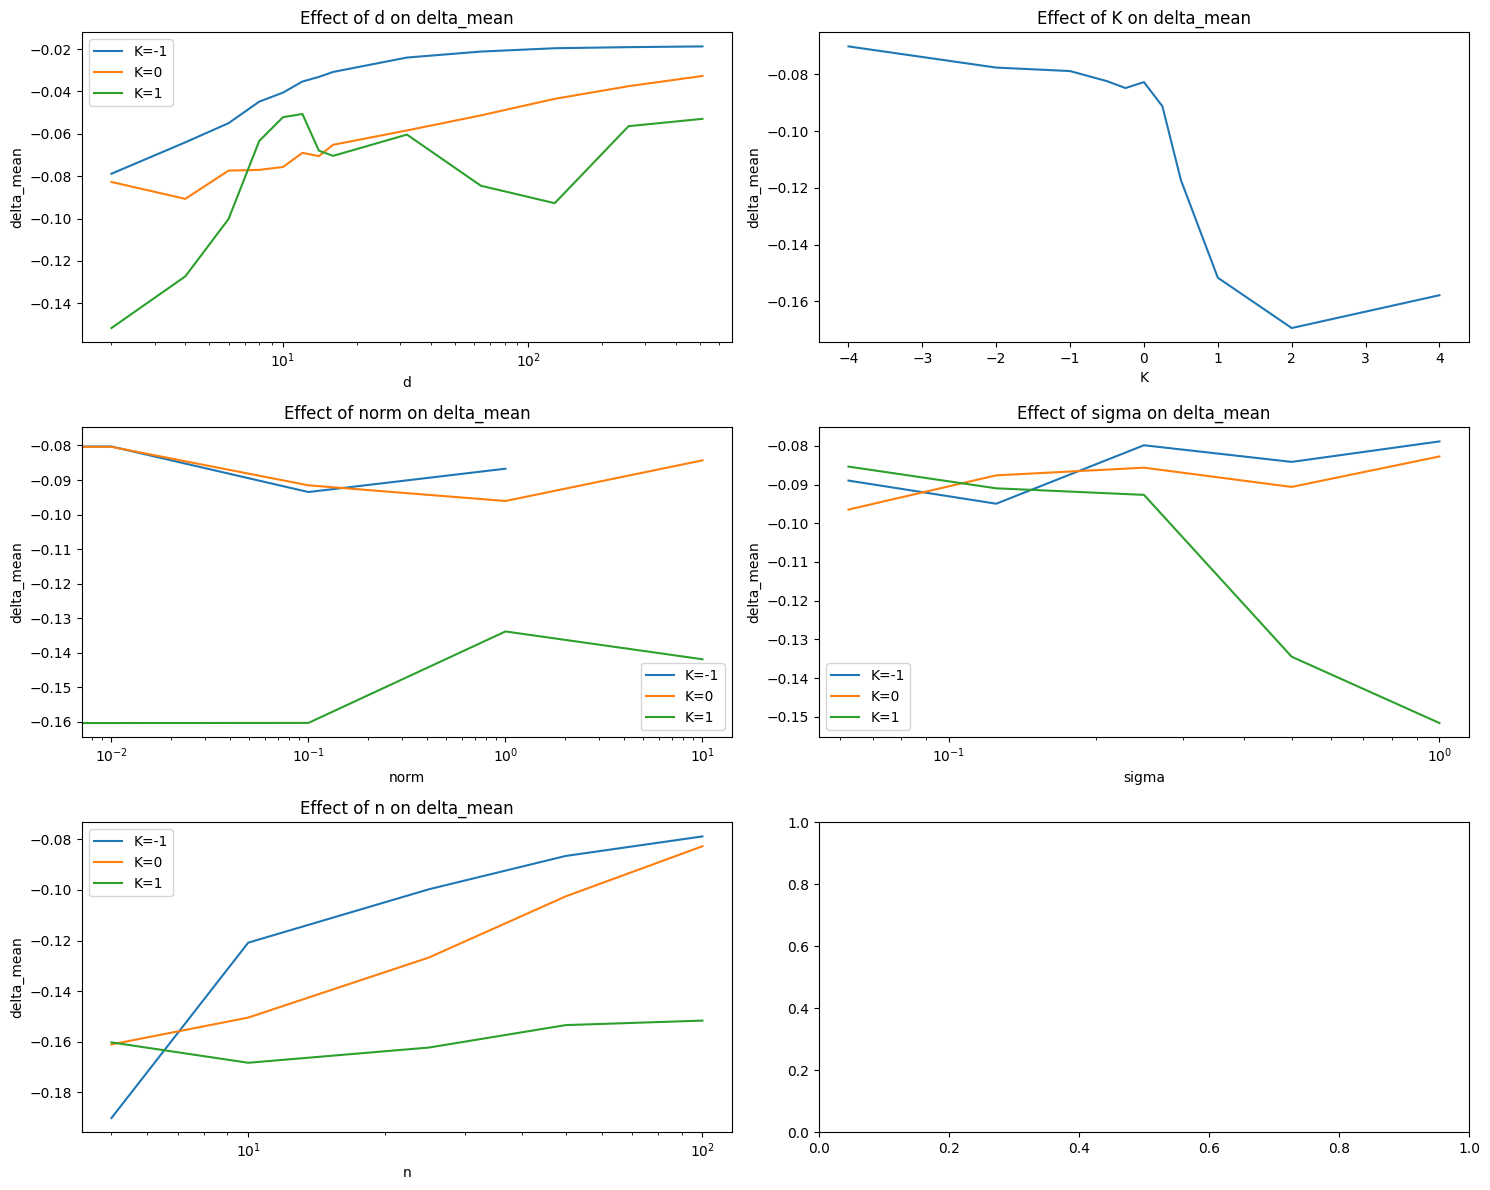

In [6]:
# Plot the effect of each variable on delta_mean

COL = "delta_mean"
# COL = "delta_max"
VARS = ["d", "K", "norm", "sigma", "n"]
DEFAULTS = {"d": 2, "K": -1, "norm": 0, "sigma": 1, "n": 100}
K_VALUES = [-1, 0, 1]  # Values of K to compare

fig, axs = plt.subplots(3, 2, figsize=FIGSIZE)
for var, ax in zip(VARS, axs.flatten()):
    ax.set_title(f"Effect of {var} on {COL}")

    if var == "K":
        # For K plot, use the defaults for other variables
        df_filtered = deltas.copy()
        for filter_var in VARS:
            if filter_var != var:
                df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

        df_grouped = df_filtered.groupby(var).mean()
        ax.plot(df_grouped.index, df_grouped[COL])

    else:
        # For other variables, plot multiple lines for different K values
        for k_val in K_VALUES:
            df_filtered = deltas.copy()
            for filter_var in VARS:
                if filter_var == var:
                    continue  # Skip the variable we're plotting on x-axis
                elif filter_var == "K":
                    df_filtered = df_filtered[df_filtered[filter_var] == k_val]
                else:
                    df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

            df_grouped = df_filtered.groupby(var).mean()
            ax.plot(df_grouped.index, df_grouped[COL], label=f"K={k_val}")

        ax.legend()

    # Improve axis labels
    ax.set_xlabel(var)
    ax.set_ylabel(COL)

    # Use log scale for dimension
    if var != "K":
        ax.set_xscale("log")
        # ax.set_yscale("log")

plt.tight_layout()

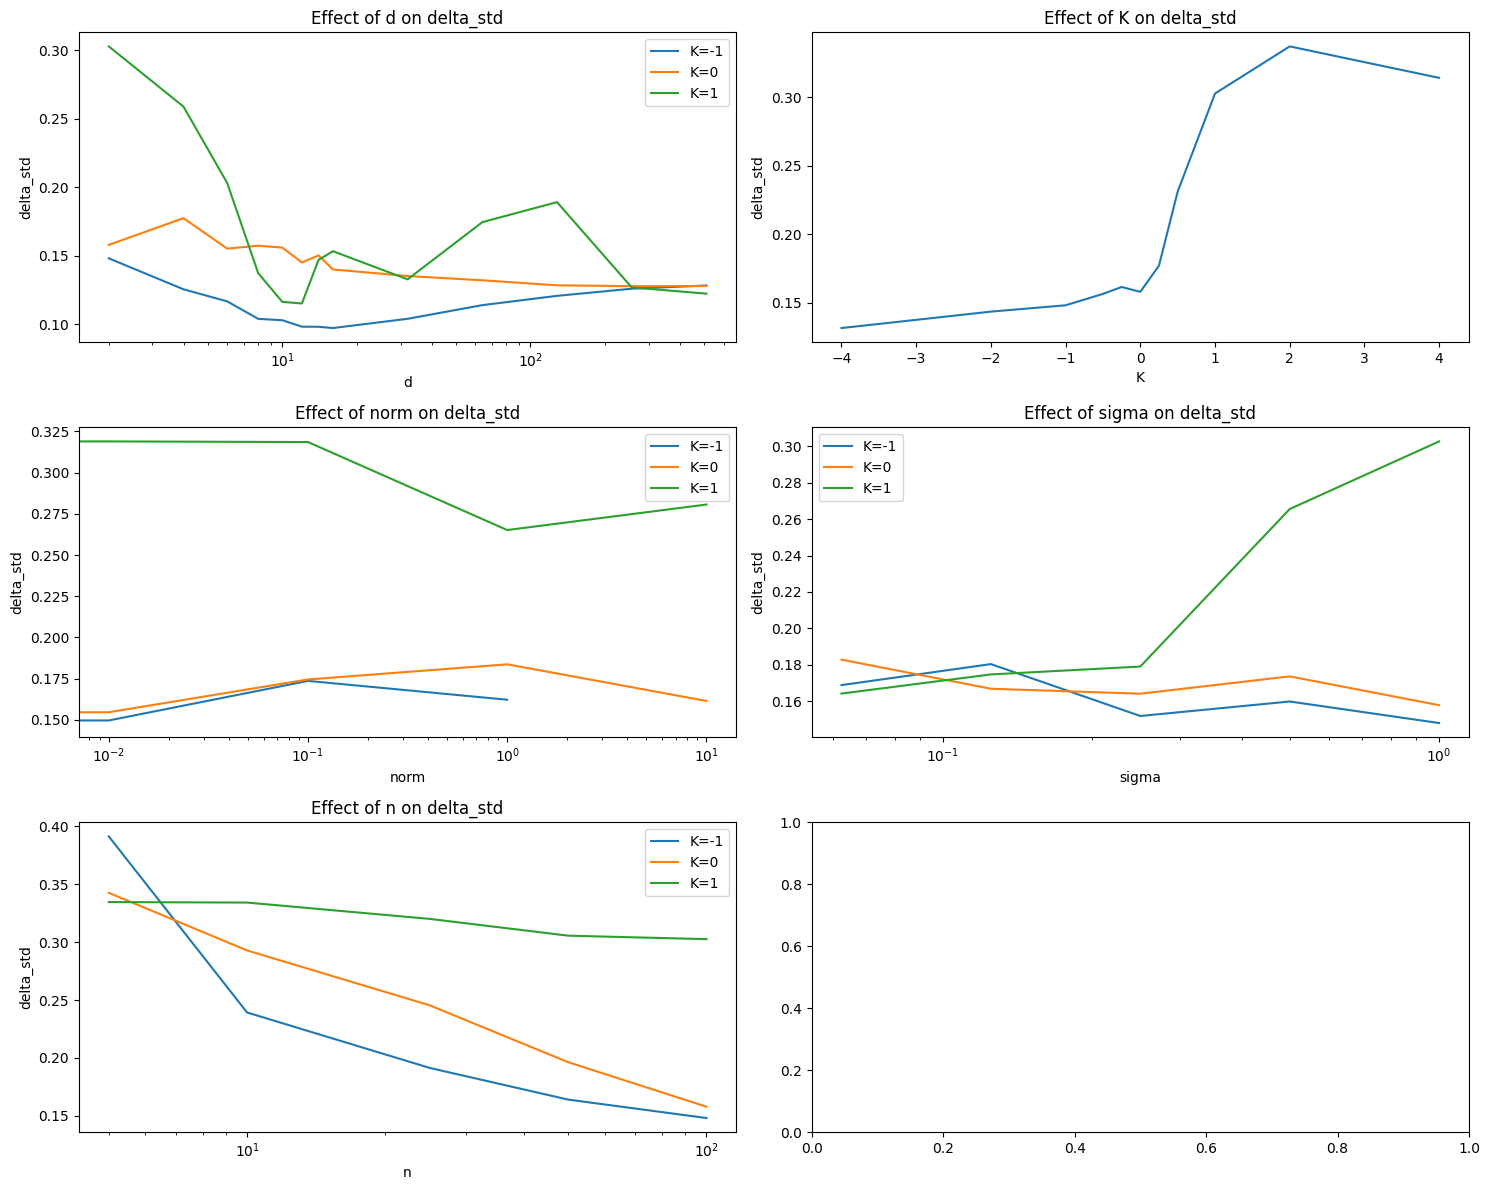

In [9]:
# Plot the effect of each variable on delta_mean

COL = "delta_std"
# COL = "delta_max"
VARS = ["d", "K", "norm", "sigma", "n"]
DEFAULTS = {"d": 2, "K": -1, "norm": 0, "sigma": 1, "n": 100}
K_VALUES = [-1, 0, 1]  # Values of K to compare

fig, axs = plt.subplots(3, 2, figsize=FIGSIZE)
for var, ax in zip(VARS, axs.flatten()):
    ax.set_title(f"Effect of {var} on {COL}")

    if var == "K":
        # For K plot, use the defaults for other variables
        df_filtered = deltas.copy()
        for filter_var in VARS:
            if filter_var != var:
                df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

        df_grouped = df_filtered.groupby(var).mean()
        ax.plot(df_grouped.index, df_grouped[COL])

    else:
        # For other variables, plot multiple lines for different K values
        for k_val in K_VALUES:
            df_filtered = deltas.copy()
            for filter_var in VARS:
                if filter_var == var:
                    continue  # Skip the variable we're plotting on x-axis
                elif filter_var == "K":
                    df_filtered = df_filtered[df_filtered[filter_var] == k_val]
                else:
                    df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

            df_grouped = df_filtered.groupby(var).mean()
            ax.plot(df_grouped.index, df_grouped[COL], label=f"K={k_val}")

        ax.legend()

    # Improve axis labels
    ax.set_xlabel(var)
    ax.set_ylabel(COL)

    # Use log scale for dimension
    if var != "K":
        ax.set_xscale("log")
        # ax.set_yscale("log")

plt.tight_layout()

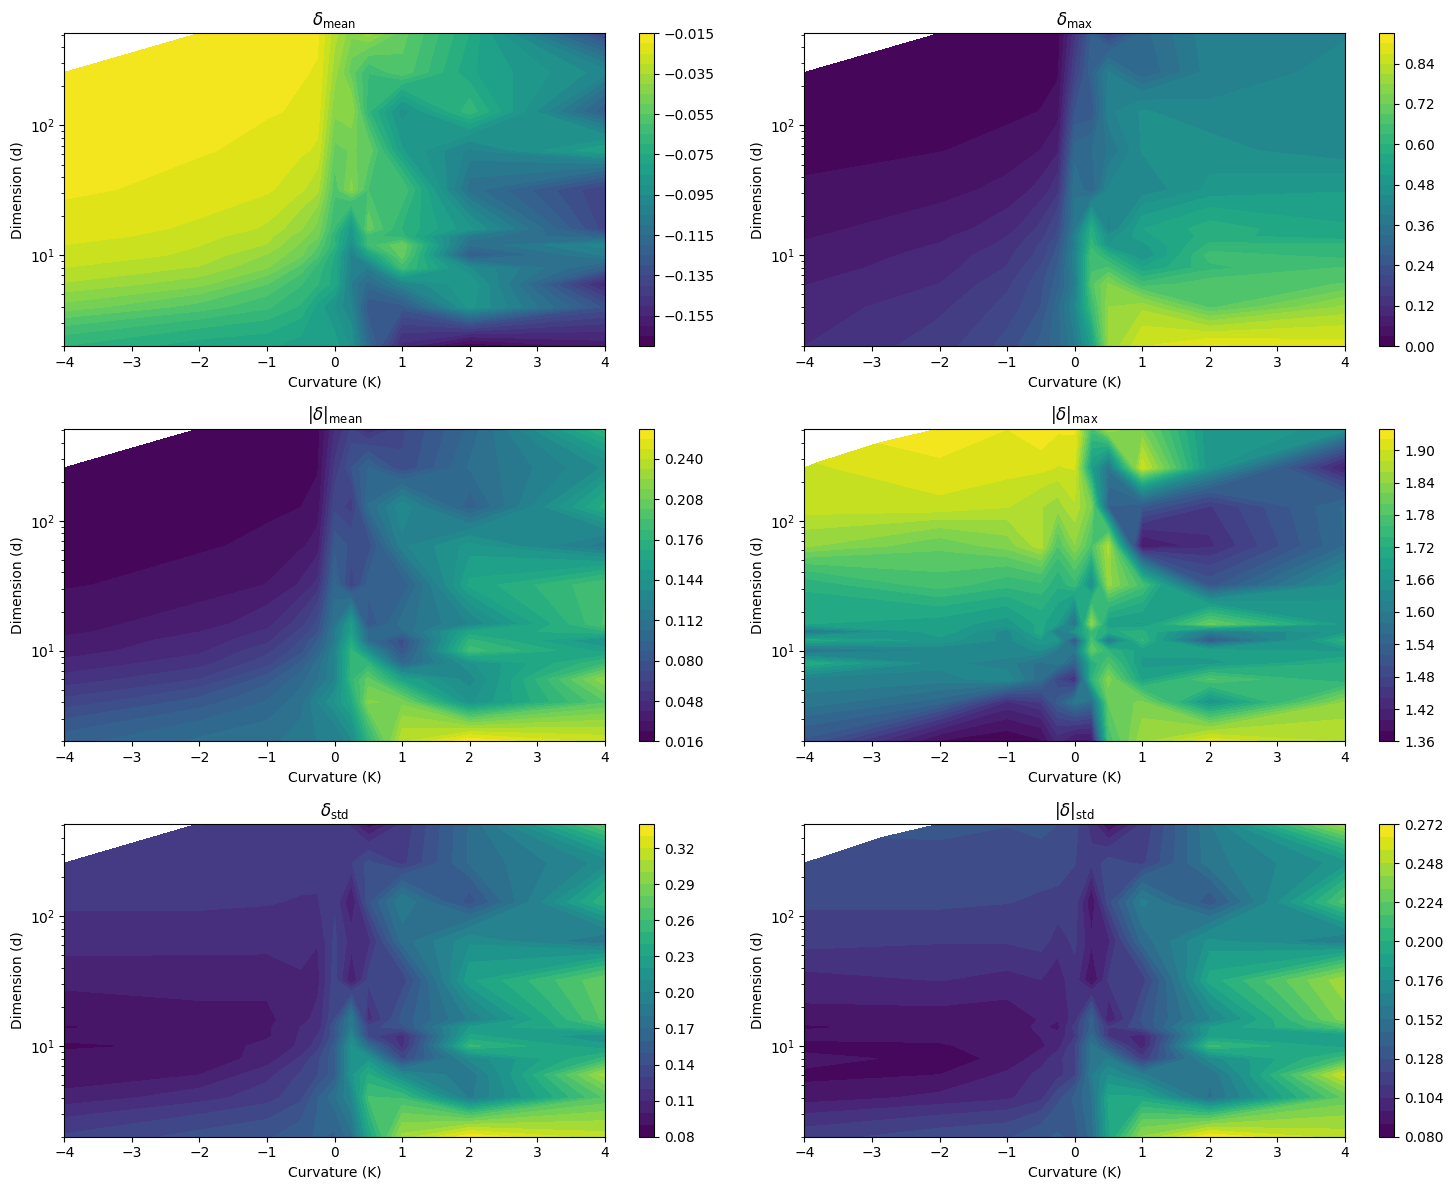

In [10]:
metrics = ["delta_mean", "delta_max", "delta_abs_mean", "delta_abs_max", "delta_std", "delta_abs_std"]
names = [
    r"$\delta_\text{mean}$",
    r"$\delta_\text{max}$",
    r"$|\delta|_\text{mean}$",
    r"$|\delta|_\text{max}$",
    r"$\delta_\text{std}$",
    r"$|\delta|_\text{std}$",
]

fig, axs = plt.subplots(3, 2, figsize=FIGSIZE)
for metric, ax, name in zip(metrics, axs.flatten(), names):
    piv = deltas[(deltas[["n", "sigma", "norm"]] == (100, 1, 0)).all(axis=1)].pivot_table(
        index="d", columns="K", values=metric
    )
    X = piv.columns.astype(float)
    Y = piv.index.astype(float)
    Z = piv.values

    cs = ax.contourf(X, Y, Z, levels=30, cmap="viridis")
    fig.colorbar(cs, ax=ax)

    ax.set_xscale("linear")
    ax.set_yscale("log")
    ax.set_xlabel("Curvature (K)")
    ax.set_ylabel("Dimension (d)")
    ax.set_title(name)

plt.tight_layout()
plt.show()

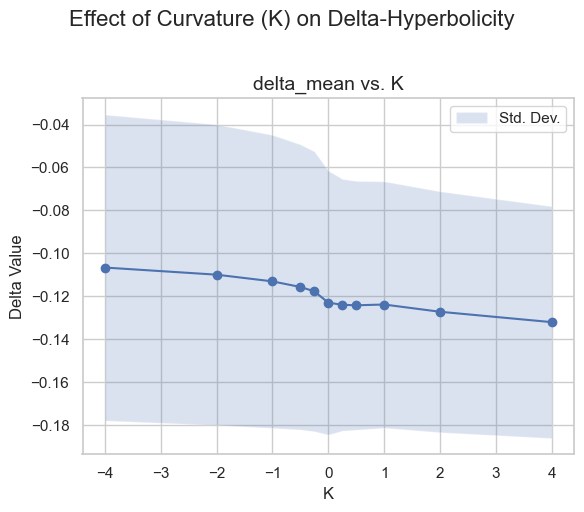

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data from the URL
url = "https://raw.githubusercontent.com/pchlenski/delta/refs/heads/main/deltas.csv"
df = pd.read_csv(url)

# Clean up the dataframe
df = df.rename(columns={"Unnamed: 0": "id"})
df = df.dropna()

# Set plot style
sns.set_theme(style="whitegrid")


def plot_relationship(df, x_var, y_vars, title_suffix, log_x=False, filter_K_type=None):
    """
    Helper function to plot the relationship between an independent variable and delta metrics.
    Groups data by the x_var and plots the mean of the y_vars with a shaded standard deviation.
    """
    fig, ax = plt.subplots(1, len(y_vars), figsize=(6 * len(y_vars), 5), sharey=True)
    if len(y_vars) == 1:
        ax = [ax]  # Make it iterable

    for i, y_var in enumerate(y_vars):

        plot_df = df.copy()
        # Optional filter for curvature type
        if filter_K_type == "hyperbolic":
            plot_df = df[df["K"] < 0]
        elif filter_K_type == "spherical":
            plot_df = df[df["K"] > 0]

        # Group by the independent variable and calculate mean/std for the dependent variable
        grouped = plot_df.groupby(x_var)[y_var].agg(["mean", "std"]).reset_index()

        ax[i].plot(grouped[x_var], grouped["mean"], marker="o", linestyle="-")
        ax[i].fill_between(
            grouped[x_var],
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.2,
            label="Std. Dev.",
        )

        ax[i].set_xlabel(x_var, fontsize=12)
        if i == 0:
            ax[i].set_ylabel("Delta Value", fontsize=12)
        ax[i].set_title(f"{y_var} vs. {x_var}", fontsize=14)
        if log_x:
            ax[i].set_xscale("log")
        ax[i].legend()

    plt.suptitle(f"Effect of {title_suffix} on Delta-Hyperbolicity", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


plot_relationship(df, "K", ["delta_mean"], "Curvature (K)")

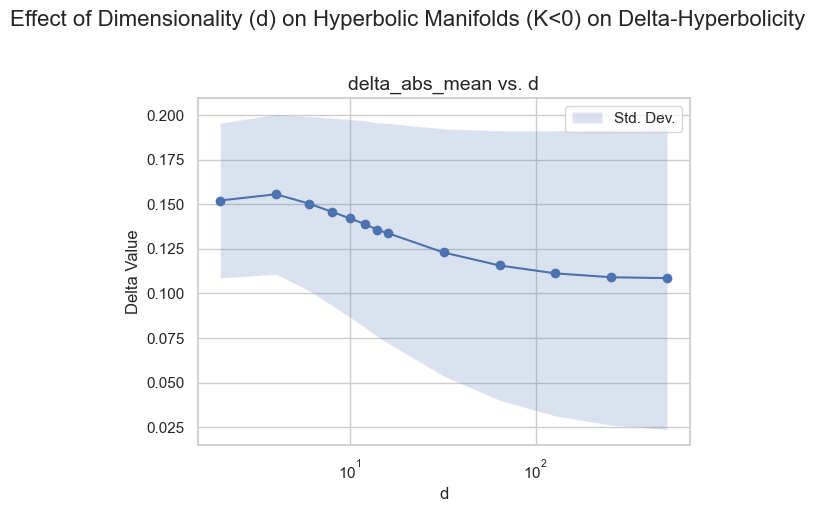

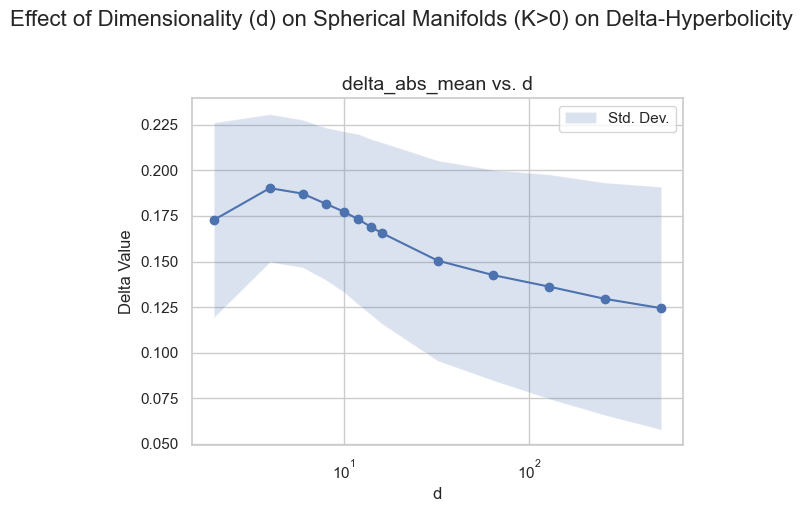

In [18]:
plot_relationship(df, 'd', ['delta_abs_mean'], 'Dimensionality (d) on Hyperbolic Manifolds (K<0)', log_x=True, filter_K_type='hyperbolic')
plot_relationship(df, 'd', ['delta_abs_mean'], 'Dimensionality (d) on Spherical Manifolds (K>0)', log_x=True, filter_K_type='spherical')

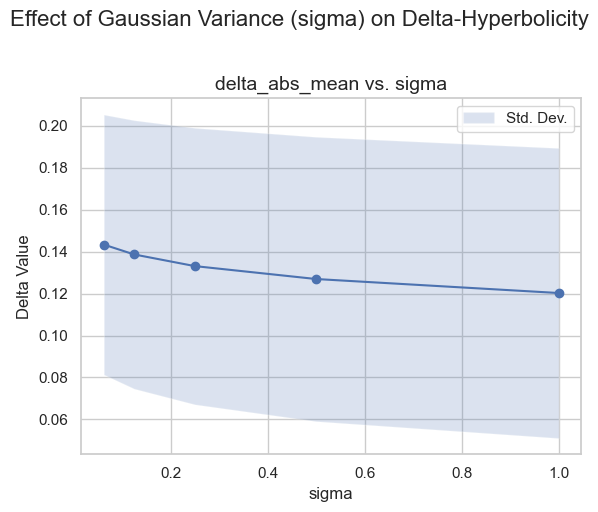

In [19]:
plot_relationship(df, 'sigma', ['delta_abs_mean'], 'Gaussian Variance (sigma)', filter_K_type='hyperbolic')

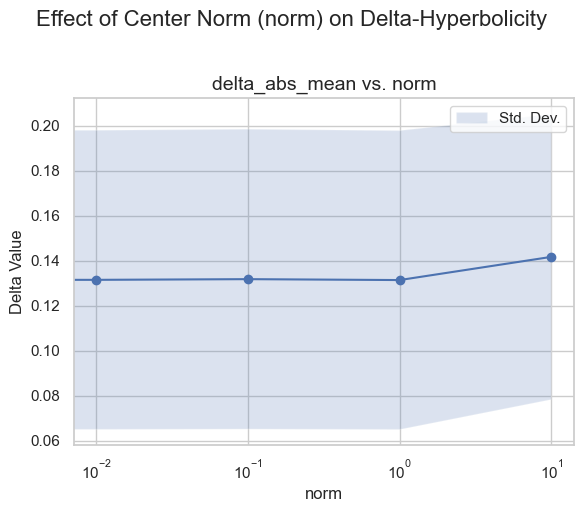

In [20]:
plot_relationship(df, 'norm', ['delta_abs_mean'], 'Center Norm (norm)', log_x=True, filter_K_type='hyperbolic')

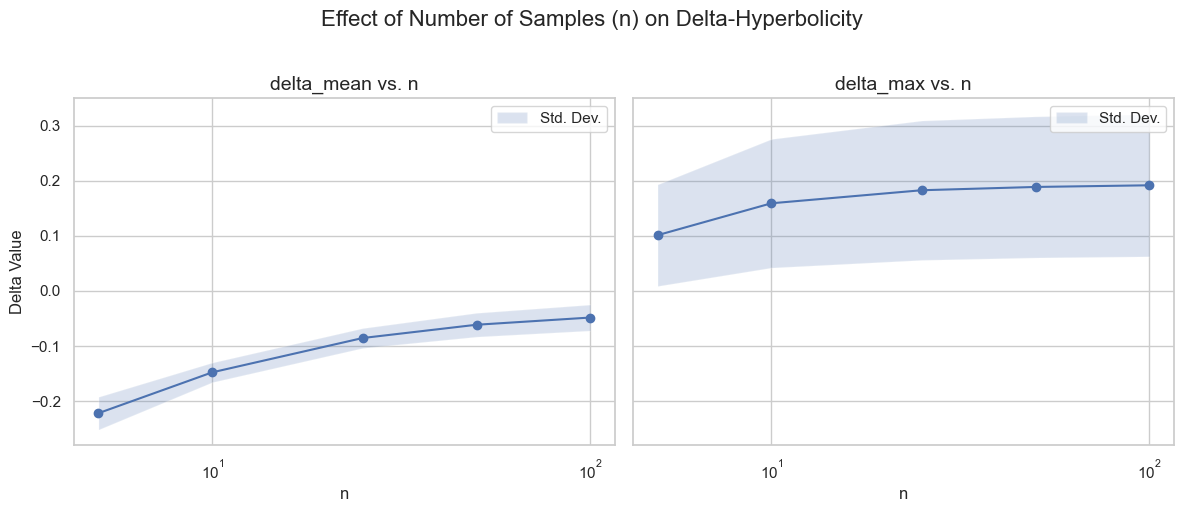

In [21]:
plot_relationship(df, 'n', ['delta_mean', 'delta_max'], 'Number of Samples (n)', log_x=True, filter_K_type='hyperbolic')

In [22]:
# Create transformed variables for the model
model_df = df.copy()
# Use abs(K) as the main curvature driver, add small epsilon for log
model_df['abs_K'] = np.abs(model_df['K'])
model_df['log_d'] = np.log(model_df['d'])
model_df['log_sigma'] = np.log(model_df['sigma'])
model_df['log_norm'] = np.log(model_df['norm'] + 1e-6) # Epsilon for norm=0
model_df['log_n'] = np.log(model_df['n'])
model_df['log_delta_abs_mean'] = np.log(model_df['delta_abs_mean'] + 1e-9) # Epsilon for delta=0

# Define the model formula
formula = (
    "log_delta_abs_mean ~ "
    "abs_K + log_d + log_sigma + log_norm + log_n + "
    "abs_K:log_d + abs_K:log_sigma" # Interaction terms
)

# Fit the Ordinary Least Squares model
model = smf.ols(formula, data=model_df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     log_delta_abs_mean   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 3.251e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:13:14   Log-Likelihood:                -58459.
No. Observations:              168823   AIC:                         1.169e+05
Df Residuals:                  168815   BIC:                         1.170e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6299      0.004   -1

In [23]:
# The setup code from the previous response is assumed to have been run
# (loading data, defining plot_relationship helper function, etc.)

# Split the dataframe
df_hyperbolic = df[df['K'] <= 0].copy()
df_spherical = df[df['K'] >= 0].copy()

print(f"Hyperbolic/Euclidean samples: {len(df_hyperbolic)}")
print(f"Spherical/Euclidean samples: {len(df_spherical)}")

Hyperbolic/Euclidean samples: 87573
Spherical/Euclidean samples: 97500


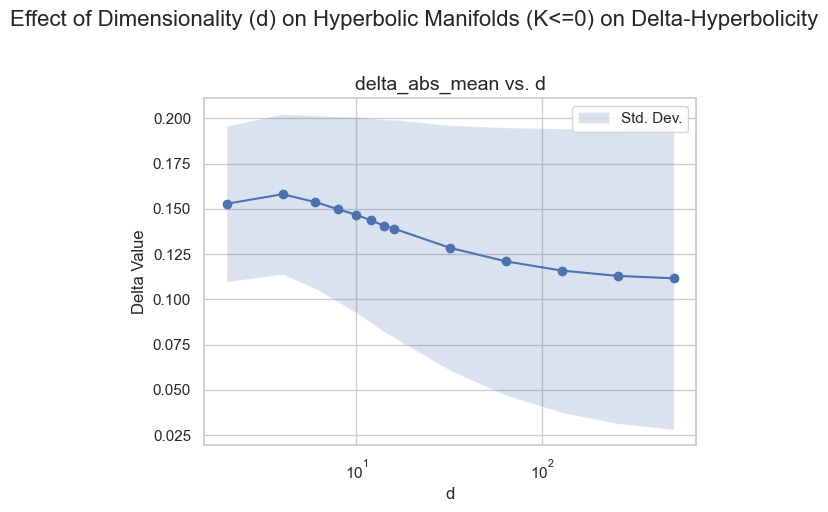

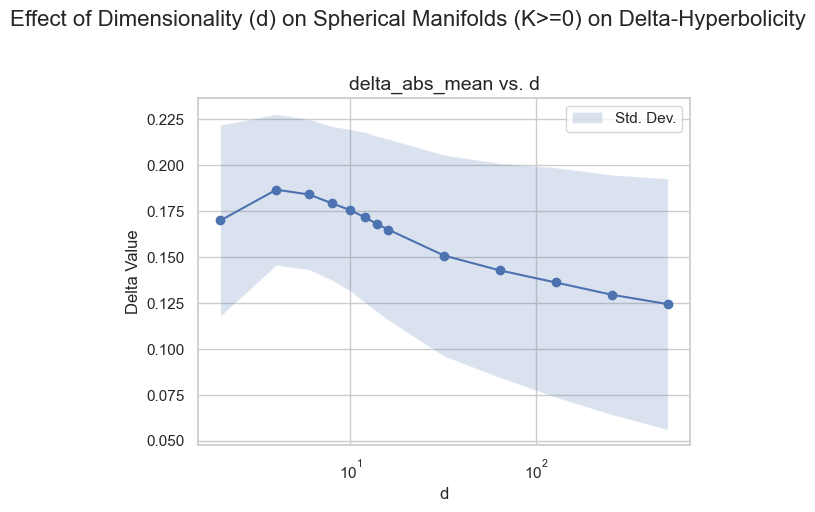

In [24]:
# Re-using the plot_relationship function defined in the previous response
plot_relationship(df_hyperbolic, 'd', ['delta_abs_mean'], 'Dimensionality (d) on Hyperbolic Manifolds (K<=0)', log_x=True)
plot_relationship(df_spherical, 'd', ['delta_abs_mean'], 'Dimensionality (d) on Spherical Manifolds (K>=0)', log_x=True)

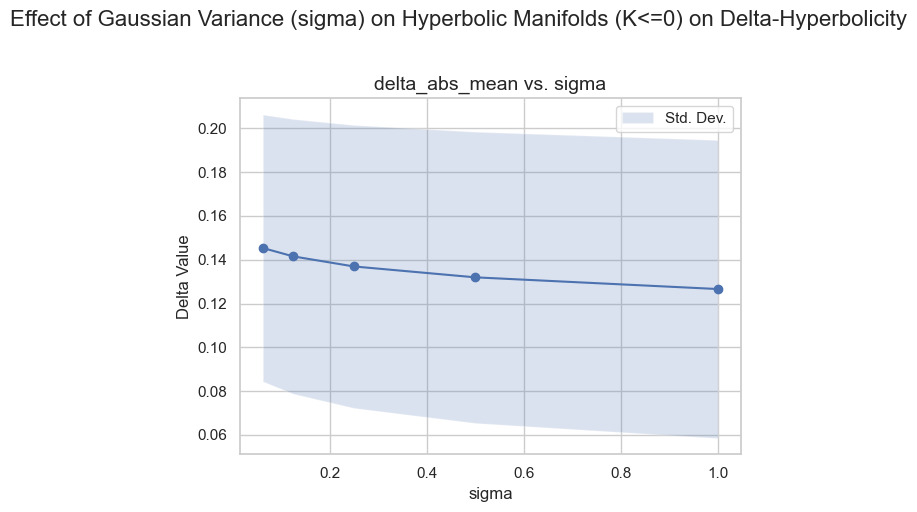

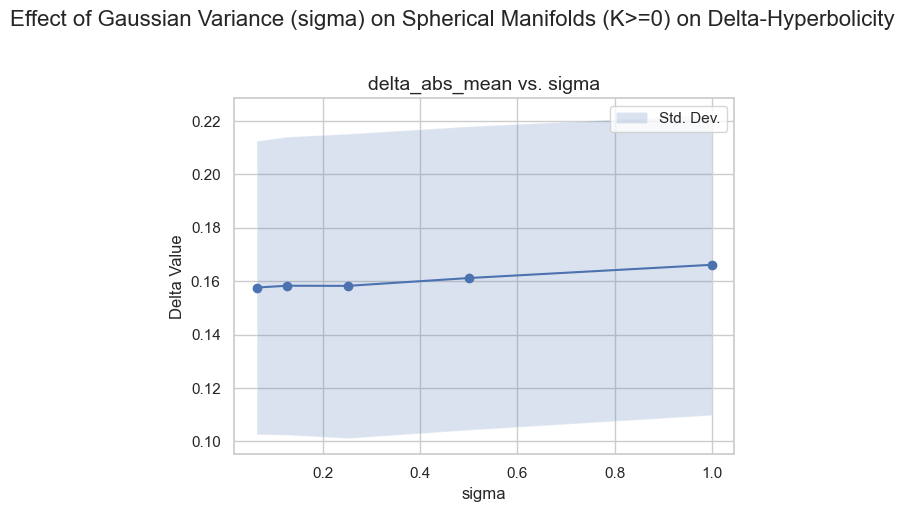

In [25]:
plot_relationship(df_hyperbolic, 'sigma', ['delta_abs_mean'], 'Gaussian Variance (sigma) on Hyperbolic Manifolds (K<=0)')
plot_relationship(df_spherical, 'sigma', ['delta_abs_mean'], 'Gaussian Variance (sigma) on Spherical Manifolds (K>=0)')

In [37]:
df

,Unnamed: 0,d,K,norm,sigma,n,trial,delta_max,delta_mean,delta_abs_max,delta_abs_mean,delta_std,delta_abs_std,abs_K,log_abs_K,log_d,log_sigma
0,0,2.0,-4.0,0.0,0.0625,5.0,0.0,0.356044,-0.222216,2.000000,0.250318,0.438705,0.423300,4.0,1.386319,0.693147,-2.772589
1,1,2.0,-4.0,0.0,0.0625,5.0,1.0,0.147396,-0.155385,2.000000,0.171318,0.335217,0.327361,4.0,1.386319,0.693147,-2.772589
2,2,2.0,-4.0,0.0,0.0625,5.0,2.0,0.077345,-0.241864,2.000000,0.247315,0.490871,0.488148,4.0,1.386319,0.693147,-2.772589
3,3,2.0,-4.0,0.0,0.0625,5.0,3.0,0.401729,-0.198814,1.846844,0.227786,0.393135,0.377088,4.0,1.386319,0.693147,-2.772589
4,4,2.0,-4.0,0.0,0.0625,5.0,4.0,0.279749,-0.194695,1.410722,0.213009,0.373831,0.363707,4.0,1.386319,0.693147,-2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178745,178745,512.0,4.0,10.0,1.0000,100.0,5.0,0.349225,-0.122656,1.720561,0.155449,0.256925,0.238517,4.0,1.386319,6.238325,0.000000
178746,178746,512.0,4.0,10.0,1.0000,100.0,6.0,0.342946,-0.116883,1.480546,0.155742,0.229896,0.205568,4.0,1.386319,6.238325,0.000000
178747,178747,512.0,4.0,10.0,1.0000,100.0,7.0,0.470456,-0.098715,1.180167,0.140086,0.198077,0.171333,4.0,1.386319,6.238325,0.000000
178748,178748,512.0,4.0,10.0,1.0000,100.0,8.0,0.436875,-0.084050,1.306921,0.122097,0.176281,0.152419,4.0,1.386319,6.238325,0.000000


In [44]:
from gplearn.genetic import SymbolicRegressor
from gplearn._program import _Program
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load and preprocess
df = pd.read_csv("~/Downloads/deltas.csv")
df = df[df["K"] <= 0].dropna(subset=["delta_abs_std", "norm", "n"])

df["abs_K"] = np.abs(df["K"])
df["log_d"] = np.log(df["d"])
df["log_sigma"] = np.log(df["sigma"])
df["log_abs_K"] = np.log(df["abs_K"] + 1e-4)
df["log_n"] = np.log(df["n"])
df["log_norm"] = np.log(np.abs(df["norm"]) + 1e-4)

X = df[[
    "d", "sigma", "K", "abs_K",
    "log_d", "log_sigma", "log_abs_K",
    "n", "log_n", "norm", "log_norm"
]].values
y = df["delta_abs_std"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: train once to initialize function set
est = SymbolicRegressor(
    population_size=1000,
    generations=50,
    init_depth=(3, 5),
    function_set=['add', 'sub', 'mul', 'div', 'log', 'sqrt'],
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.001,
    random_state=42
)

# Dummy fit to build internals
est.fit(X_train, y_train)

# Step 2: create and inject seed expression
seed_expr = "add(mul(log_abs_K, 0.5), mul(log_sigma, 1.2))"
seed_prog = _Program(
    program=seed_expr,
    function_set=est.function_set,
    arities={f.name: f.arity for f in est._function_set},
    init_depth=(3, 5),
    init_method='half and half',
    metric='mean absolute error',
    const_range=(-1., 1.),
    p_point_replace=0.05,
    random_state=42,
    feature_names=[
        "d", "sigma", "K", "abs_K",
        "log_d", "log_sigma", "log_abs_K",
        "n", "log_n", "norm", "log_norm"
    ]
)

# Replace best program with seed
est._program = seed_prog

# Step 3: retrain from seeded start
est.fit(X_train, y_train)

# Step 4: evaluate
y_pred = est.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("\nBest symbolic expression:")
print(est._program)
print(f"Test R²: {r2:.4f}")


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.28          96546.5        2         0.125245         0.125705      2.56m
   1     9.33          10.7011       15        0.0661933        0.0666601      2.20m
   2     9.83          4.53187       19        0.0308051        0.0300707      2.17m
   3    10.49          3.40162       20        0.0307089        0.0309365      2.09m
   4    14.99          1.88499       19        0.0306494        0.0314722      2.55m
   5    14.95          78.3949       36        0.0306254        0.0316888      2.77m
   6    11.21          1.94581       15        0.0306272         0.031672      2.29m
   7     9.62          2.17741       10        0.0306329        0.0316212      1.94m
   8     8.01          33.2541        8         0.030622        0.0317187  

TypeError: _Program.__init__() missing 2 required positional arguments: 'n_features' and 'parsimony_coefficient'